<a href="https://colab.research.google.com/github/amplabs-ai/amplabs/blob/main/python/AmpLabs_Example_Basic_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AmpLabs Example





In this demo you will learn how to:

1. Upload/Download various types of battery data from **AmpLabs JSON API**
2. Perform simple filtering on battery data

**Pandas** is an easy-to-use data structures and data analysis tools for the Python programming language. In Pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc. When working with tabular data, such as data stored in spreadsheets or databases, pandas will help you to explore, clean, and process your data. In pandas, a data table is called a **Data Frame**.

Note: Pandas is built off of another library called **NumPy**. 


# Key Terms

**API** Application Programming Interface is a set of definitions and protocols for building and integrating application software. AmpLabs provides an API to help you access and control your data.

**JavaScript Object Notation** is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. Win/Win

[JSON](https://www.json.org/json-en.html) is commonly used as an output format from websites. AmpLabs provides a JSON API for your Battery Data. Records for your battery data look like the following: 

``` JSON
{
    "detail": "Records Retrieved",
    "records": [
        [
            {
                "charge_step_count": null,
                "cycle_charge_capacity": 1.026650590728431,
                "cycle_charge_energy": 3.5721314343688153,
                "cycle_coulombic_efficiency": 1.0020317221497879,
                "cycle_discharge_capacity": 1.0287364594737067,
                "cycle_discharge_energy": 3.129065924887601,
                "cycle_duration": 2529.3717,
                "cycle_end_timestamp": "2022-09-06T17:42:31.223598Z",
                "cycle_energy_efficiency": 0.8759660674245312,
                "cycle_index": 1,
                "cycle_max_charge_power": 23.36383866394476,
                "cycle_max_current": 6.6025085,
                "cycle_max_discharge_power": 15.200998988505711,
                "cycle_max_power": 23.36383866394476,
                "cycle_max_rest_voltage": 3.5980968,
                "cycle_max_voltage": 3.6001949,
                "cycle_mean_charge_power": 9.714367248195945,
                "cycle_mean_charge_voltage": 3.3811619645885287,
                "cycle_mean_discharge_power": -10.992575217325712,
                "cycle_mean_discharge_voltage": 2.793457597077922,
                "cycle_mean_power": 0.703100827021039,
                "cycle_mean_voltage": 3.1228079950344827,
                "cycle_min_charge_power": 0.15608810761640943,
                "cycle_min_current": -4.4012828,
                "cycle_min_discharge_power": 0.109924433457156,
                "cycle_min_power": 0.0,
                "cycle_min_rest_voltage": 2.0303135,
                "cycle_min_voltage": 1.9997959,
                "cycle_resistance_end_of_charge": 0.197672471838036,
                "cycle_resistance_end_of_discharge": -0.1099885647713824,
                "cycle_resistance_start_of_charge": 0.993497447188566,
                "cycle_resistance_start_of_discharge": -1.89296425266147,
                "cycle_start_timestamp": "2022-09-06T17:00:21.851898Z",
                "cycle_time": null,
                "cycle_total_rest_time": 105613.492,
                "cycle_voltage_efficiency": null,
                "datapoint_count": 725,
                "discharge_step_count": null,
                "dt_end_of_charge": 2.1689000000005763,
                "dt_end_of_discharge": 3.8768999999992957,
                "dt_start_of_charge": 0.0,
                "dt_start_of_discharge": 0.16220000000066648,
                "dv_end_of_charge": -0.0001811999999996594,
                "dv_end_of_discharge": 9.14999999999111e-05,
                "dv_start_of_charge": 0.0,
                "dv_start_of_discharge": -0.010403600000000068,
                "rest_step_count": null,
                "step_count": null,
                "test_time": 7527.4484
            },
        ]
    ],
    "status": 200
}
```

**Data Frame**. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
[Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)



``` Python
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
```

In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the libraries we downloaded into the Python environment

In [2]:
# Useful for fetching data from the web 

import json
import requests
import gzip
import json
from fileinput import filename
import shutil
import time
import matplotlib.pyplot as plt
import seaborn as sns

# PyData Libraries

import pandas as pd
import numpy as np

# Define Helper Functions

The following section defines functions that will help us **read** data from and **write** data to the AmpLabs JSON API. 



## Functions to help Get Data from AmpLabs




In [9]:
# Function used to fetch cycle data from AmpLabs
def get_amplabs_cycledata(user_token, cell_id):
    url = "https://www.amplabs.ai/download/cells/cycle_data_json?cell_id={}".format(cell_id.replace('/','%2F'))
    headers = {
    "Authorization": "Bearer {}".format(user_token),
    }
    try:
        response = requests.request("GET", url, headers=headers)
        res =  json.loads(response.text)
        response = requests.request("GET",res["response_url"])
        response = gzip.decompress(response.content)
        return json.loads(response.decode()), 1
    except requests.exceptions.RequestException as e:
        print(e)
    return None,0


# Function used to fetch timeseries data from AmpLabs
def get_amplabs_timeseriesdata(user_token, cell_id):
    url = "https://www.amplabs.ai/download/cells/cycle_timeseries_json?cell_id={}".format(cell_id.replace('/','%2F'))
    headers = {
    "Authorization": "Bearer {}".format(user_token),
    }
    try:
        response = requests.request("GET", url, headers=headers)
        res =  json.loads(response.text)
        response = requests.request("GET",res["response_url"])
        response = gzip.decompress(response.content)
        return json.loads(response.decode()), 1
    except requests.exceptions.RequestException as e:
        print(e)
    return None,0


# Function used to fetch test meta data from AmpLabs
def get_amplabs_meta(user_token, cell_id):
    url = 'https://www.amplabs.ai/cells/tests/cycle/metaWithId?cell_id={}'.format(cell_id.replace('/','%2F'))
    headers = {
    "Authorization": "Bearer {}".format(user_token),
    }
    try:
        response = requests.request("GET", url, headers=headers)
        response = json.loads(response.text)
        return response, 1
    except requests.exceptions.RequestException as e:
        print(e)
    return None, 0

**Check your understanding**
1. What is JSON? 

2. Is JSON machine readable?

3. What is a GET Request?

In [6]:
user_token = "<your-token>"
cell_id = 'your-cell-id'

In [7]:
get_amplabs_meta(user_token, cell_id)

https://www.amplabs.ai/cells/tests/cycle/meta?cell_id=NMC-E4-2


({'detail': 'Records Retrieved',
  'records': [[{'cell_id': 'NMC-E4-2',
     'crate_c': 0.0,
     'crate_d': 0.0,
     'index': 519,
     'soc_max': 0.0,
     'soc_min': 0.0,
     'temperature': 0.0,
     'v_max': None,
     'v_min': None},
    {'cell_id': 'alluaudite',
     'crate_c': 0.05,
     'crate_d': 0.05,
     'index': 345,
     'soc_max': 0.0,
     'soc_min': 0.0,
     'temperature': 25.0,
     'v_max': None,
     'v_min': None},
    {'cell_id': 'alluaudite2',
     'crate_c': 0.0,
     'crate_d': 0.0,
     'index': 346,
     'soc_max': 0.0,
     'soc_min': 0.0,
     'temperature': 0.0,
     'v_max': None,
     'v_min': None}]],
  'status': 200},
 1)

# Fetch data and store it into a dictionary of data frames

In [10]:
response, status = get_amplabs_timeseriesdata(user_token, cell_id)
df = pd.DataFrame(response['records'][0])
df.head()

,capacity_throughput,cell_temperature,charge_capacity,charge_energy,cumulative_charge_capacity,cumulative_charge_energy,cumulative_discharge_capacity,cumulative_discharge_energy,current,cycle_charge_capacity,...,power,step_datapoint_ordinal,step_index,step_time,step_type,test_datapoint_ordinal,test_net_capacity,test_net_enerygy,test_time,voltage
0,0.000000,None,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.469131,0.000000,...,0.993497,None,None,None,Charge,1,0.000000,None,4998.0767,2.117738
1,0.016270,None,0.000002,0.000002,0.000002,0.000002,0.0,0.0,0.683594,0.000002,...,1.457769,None,None,None,Charge,2,0.016270,None,4998.1005,2.132508
2,0.018124,None,0.000007,0.000012,0.000009,0.000014,0.0,0.0,0.897236,0.000009,...,1.929361,None,None,None,Charge,3,0.055748,None,4998.1207,2.150338
3,0.029100,None,0.000014,0.000028,0.000023,0.000042,0.0,0.0,1.106457,0.000023,...,2.401812,None,None,None,Charge,4,0.133532,None,4998.1470,2.170724
4,0.036044,None,0.000023,0.000047,0.000046,0.000090,0.0,0.0,1.370487,0.000046,...,3.014184,None,None,None,Charge,5,0.265921,None,4998.1733,2.199352


In [10]:
## ADD PLOTS HERE

In [11]:
## Voltage-time
def plot_voltage_time(df, xlim=None, ylim=None):
    """
    DESCRIPTION: Given arbin data in the form of either a .res, .csv, or .xlsx file, will parse the file and plot voltage versus time graphs
                 Sample-specific details not found in the arbin file such as molar mass, 
                 active mass, ion type, ect. can be specified by user PARAMETERS, and by editing an external supplementary data file, specified 
                 by SUPPLEMENTARY_DATA_PATH. Thus, make sure that your arbin file name matches the sample name in the supplementary data file. 
                 Note that underscores "_" in the data file are automatically replaced by periods "." in the supplementary data file.
    PARAMETERS:
        data_files: list of strings
            A list containing the file names, including extensions, of the arbin data to read. Failing to put extensions may result
            in the wrong file being read. If "choose_file" is set to TRUE, this argument is ignored
        choose_files: Boolean
            If this is set to True, will prompt a file explorer dialouge for the user to manually choose files
        cycle_range: list of integers
            A zero-indexed list of cycle numbers to be plotted, for each rate.
        rate_list: list of strings
            The list of C-rates being tested. Used for labelling the plots. 
        x_lim: None, tuple of floats (float, float)
            The x-axis plot range. If set to None, uses matplotlib's default
        y_lim: None, tuple of floats (float, float)
            The y-axis plot range. If set to None, uses matplotlin's default
        ion: string
            the ion that is being conducted. This will affect the axis labels on the plot
    RETURNS: None
    """
    # plot parameters
    plt.rcParams.update({'font.size': 25})
    plt.rcParams.update({'font.family':'Arial'})
    # plot size
    plt.figure(figsize=(8,7))
    # font size for x- and y- axis labels
    fsize = 25  
    ax = plt.gca()
    plt.plot(df['test_time']/3600, df['voltage'], '-', linewidth=1)
    # labelling x and y axes
    plt.ylabel('Voltage [V]', fontsize=fsize)
    plt.xlabel('Time [hours]', fontsize=fsize)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    # showing the legend, can set legend size
    # plt.legend(prop={'size': 18}).set_draggable(True)
    plt.tight_layout()
    # Save matplotlib figure as png
    print('--------------------------------------------------------------------')
    plt.show()


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


--------------------------------------------------------------------


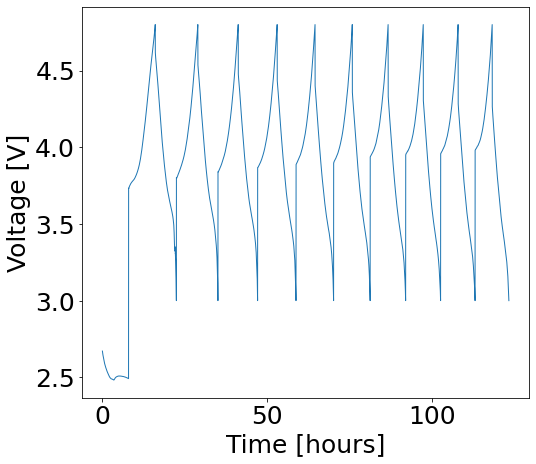

In [12]:
plot_voltage_time(df)

In [13]:
## Galvanostatic (Voltage-capacity)
def plotEchem(df, figure_save_path=None, system=None, cycle_range=range(2,3), xlim=None, ylim=None, color_theme='viridis', molar_mass=0, fig_size=(7,7),\
     show=True, ion="", style="standard"):
    """
    DESCRIPTION: Takes in a pandas dataFrame object with raw electrochemical data indexed according to cycle numbers and generates
                 a matplotlib.pyplot object, which is a plot of the galvanostatic voltage-capacity curve. It will save the plot as
                 a .png file in the directory specified by FIG_SAVE_DIR
    PARAMETERS:
        df: pandas dataframe
            a pandas dataframe object which contains data for specific capacity and voltage as each cycle index
        figure_save_path: string
            the path to save the plot 
        system: string 
            the name of the system that is being electrochemically cycled. This is usually specified by the raw data file name
        cycle_range: list of integers
            a zero-index list of cycles indices to plot
        x_lim: None, tuple of floats (float, float)
            The x-axis plot range. If set to None, uses matplotlib's default
        y_lim: None, tuple of floats (float, float)
            The y-axis plot range. If set to None, uses matplotlin's default
        show: Boolean
            whether or not to display the matplotlib plot (default=True)
        molar mass: float
            the molar mass of the active material. Used to calculate number of ion ions inserted/ extracted
        ion: string
            the ion that is being transported. Used as part of the axis label name
    RETURNS: None
    """
    # find the number of curves so that colors can be mapped
    num_curves = 0
    first_index = None
    last_index = None
    for index in cycle_range:
        if index < len(df) and index >= 0:
            if num_curves == 0:
                first_index = index
            else:
                last_index = index
            num_curves += 1
        
    # set colors
    if color_theme:
        # print(num_curves)
        sns.set_palette(color_theme, num_curves)
    # plot parameters
    plt.rcParams.update({'font.size': 25})
    plt.rcParams.update({'font.family':'Arial'})
    # plot size
    border_width=2.5
    plt.figure(figsize=fig_size, num=system, dpi=100)
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = border_width
    
    # font size for x- and y- axis labels
    fsize = 25  
    ax = plt.gca()
    tick_len = 5
    ax.tick_params(direction="in", width=border_width, length=tick_len)
    # For each cycle, plot both charge and discharge curves with the same color
    for index in cycle_range:
        # print("Original")
        # print()
        # print(df.shape)
        # print(df.head())
        if index < len(df) and index >= 0:
            # the specific capacity data for discharge curve
            index_filtered = df[df['cycle_index'] == index]
            index_filtered = index_filtered.sort_values('test_time')
#            print(index_filtered.shape)
#            print(index_filtered.head())
            discharge_cap = np.array(index_filtered[index_filtered['current'] < 0 ]['cycle_discharge_capacity'])
            # print(index_filtered)
            discharge_voltage = np.array(index_filtered[index_filtered['current'] < 0]['voltage'])
            # the specific capacity data for charge curve
            index_filtered_charge = df[(df['cycle_index'] == index)]
            charge_cap = np.array(index_filtered_charge[index_filtered_charge['current'] > 0 ]['cycle_charge_capacity'])
            charge_voltage = np.array(index_filtered_charge[index_filtered_charge['current'] > 0 ]['voltage'])

            # if style == "standard":
            #     discharge_cap = np.array(df[index]['discharge']['Discharge_Capacity'])
            # else:
            #     final_charge_cap = charge_cap[-1] 
            #     # the specific capacity data for discharge curve, altered so that the plot will better show hysterisis
            #     discharge_cap = final_charge_cap - np.array(df[index]['discharge']['Discharge_Capacity'])
            #     # the charge and discharge voltages

            # setting the color to plot
            color = next(ax._get_lines.prop_cycler)['color']

            test_time = np.array(df['test_time'])
            charge_capacity = np.array(df['charge_capacity'])
            print(df['charge_capacity'].iloc[3000:3010])
            plt.plot(discharge_cap, discharge_voltage)
            plt.plot(charge_cap, charge_voltage)
            # labelling the cycle
            # if index == first_index or index == last_index:
            #     plt.plot(charge_cap, charge_voltage, '-', color=color,  linewidth=4, label='Cycle %s'%(index+1))
            # else:
            #     plt.plot(charge_cap, charge_voltage, '-', color=color,  linewidth=4)
            # # plotting the cycle
            # plt.plot(discharge_cap, discharge_voltage, '-', color=color, linewidth=4)
    # labelling x and y axes
    plt.ylabel('Voltage [V]', fontsize=fsize)
    plt.xlabel('Capacity [mAh/g]', fontsize=fsize)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    # plt.xlim((-5, 110))
    
    # can manually set the x_ticks (this is where labels will be placed, in terms of specific capacity of active material):
    # ax.set_xticks([-10, 0, 10, 20, 30, 40, 50, 60])

    # In order to have a secondary x axis that shows the amount of ion inserted/ extracted, two functions need to be defined:
    # one to convert specific capacity to ion exchanged, and a reverse function to convert ion exhanged to specific capacity

    # given the molar mass, the specific capacity that corresponds to the insertion of one ion (Li+ or Na+) ion
    # formula: single_ion_capacity [mAh/g] =  = 1/(molar mass)*(faraday's constant)*(coulomb to mAh conversion)
    # dimensional analysis: 1/[mol/g]*[C/mol]*[mAh/C] = [mAh/g]
    # single_ion_capacity = 1/molar_mass*96500*0.2777

    # # function to convert active material specific capacity to alkali ions inserted/ extracted
    # def active_to_ion(capacity):
    #     return capacity/single_ion_capacity

    # # function to convert alkali ions inserted/ extracted to active material specific capacity
    # def ion_to_active(capacity):
    #     return capacity*single_ion_capacity

    # creates a secondary axis showing alkali ions inserted/ extracted using the two functions defined above
    # ax2 = ax.secondary_xaxis('top', functions=(active_to_ion, ion_to_active))
    # ax2.set_xlabel('{}$^+$ ions inserted/ extracted'.format(ion))
    # ax2.tick_params(direction="in", width=border_width, length=tick_len)

    # A way to manually set secondary axis ticks... not recommended
    # xticks = ax.get_xticks()
    # ax2.set_xticks(xticks)
    # ticklabels = [0, 0.5, 1.0, 1.5, 2, 2.5, 3]
    # ax2.set_xticks([x*single_ion_capacity for x in ticklabels])
    # ax2.set_xticklabels(ticklabels)

    # showing the legend, can set legend size
    plt.legend(prop={'size': 18}, frameon=False).set_draggable(True)
    plt.tight_layout()
    plt.show()
    # Save matplotlib figure as png


No handles with labels found to put in legend.


3000    0.001651
3001    0.001651
3002    0.001651
3003    0.001651
3004    0.001651
3005    0.001651
3006    0.001651
3007    0.001651
3008    0.001651
3009    0.001651
Name: Charge_Capacity (Ah), dtype: float64


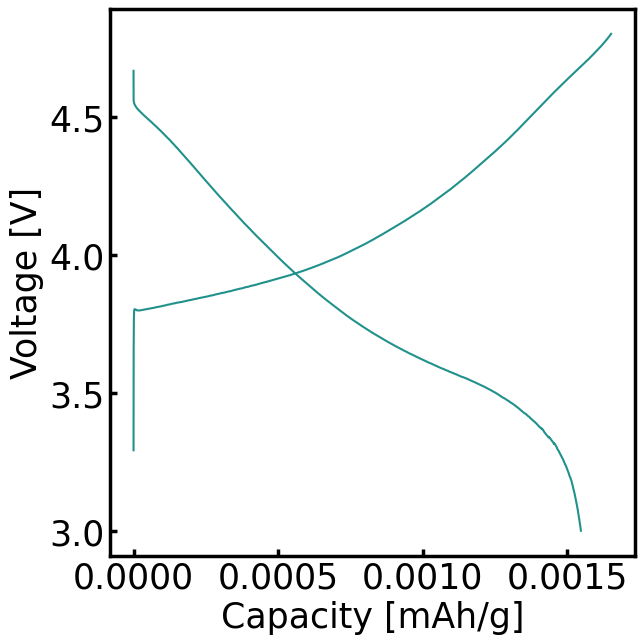

In [14]:
plotEchem(df)